In [20]:
import re
import pandas as pd
import datetime
import mysql.connector
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [21]:
conexao = mysql.connector.connect(host='localhost',user='root',password='',database='producao')
cursor = conexao.cursor()

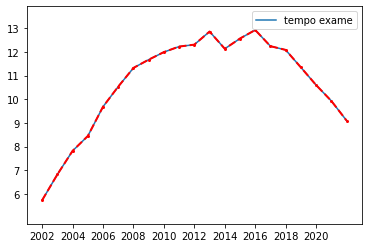

In [77]:
def numOfDays(date1, date2):
    return (date2-date1).days

y = []
x = []
#confere média de tempo de registro
for ano in range(2002, 2023, 1):
    soma = 0
    total = 0
    comando = f'select * from arqpatentes where year(concessao)={ano}'
    cursor.execute(comando)
    resultado = cursor.fetchall()
    for row in resultado:
        #print("numero= "+str(row[0]))
        #print("data deposito= "+str(row[1]))
        d=datetime.datetime.strptime(str(row[1]), "%Y-%m-%d")
        date1 = datetime.date(d.year, d.month, d.day)
        #print("data concessao= "+str(row[4]))
        d=datetime.datetime.strptime(str(row[4]), "%Y-%m-%d")
        date2 = datetime.date(d.year, d.month, d.day)
        #print(numOfDays(date1, date2)/365, "anos")
        soma = soma + numOfDays(date1, date2)
        total = total + 1
        #print("\n")
    
    media = soma/total/365
    y.append(media)
    x.append(ano)
    #print(f'Tempo médio de dias para concessão: {ano} = {media:.2f}')

plt.plot(x,y,label="tempo exame")
plt.ylim(min(y)-1, max(y) + 1)
plt.yticks(range(6,14,1))
plt.xlim(min(x)-1, max(x)+1)
plt.xticks(range(min(x), max(x),2))
plt.legend()
plt.plot(x,y,color='r' , marker='o', markersize=2, linestyle='dashed', linewidth=2)
plt.show()


Tempo médio de dias para concessão: 1836 1 = 7.68
Tempo médio de dias para concessão: 2117 2 = 7.61
Tempo médio de dias para concessão: 2261 3 = 7.53
Tempo médio de dias para concessão: 2054 4 = 7.65
Tempo médio de dias para concessão: 2853 5 = 7.51
Tempo médio de dias para concessão: 1685 6 = 7.30
Tempo médio de dias para concessão: 1653 7 = 7.06
Tempo médio de dias para concessão: 2372 8 = 6.91
Tempo médio de dias para concessão: 1902 9 = 7.20
Tempo médio de dias para concessão: 1700 10 = 6.73
Tempo médio de dias para concessão: 2253 11 = 6.60


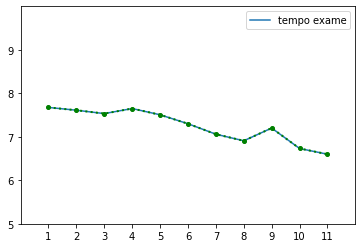

In [79]:
y = []
x = []
#confere média de tempo de registro
for mes in range(1, 12, 1):
    ano = 2022
    soma = 0
    total = 0
    comando = f'select * from arquivados where year(data)={ano} and month(data)={mes} and despacho="16.1" and anulado=0'
    cursor.execute(comando)
    resultado = cursor.fetchall()
    for row in resultado:
        numero = str(row[2])
        d=datetime.datetime.strptime(str(row[3]), "%Y-%m-%d")
        date1 = datetime.date(d.year, d.month, d.day)
        
        comando = f"select * from publicados where numero='{numero}'"
        try:
            cursor.execute(comando)
            resultado = cursor.fetchone()
            if resultado is not None:
                d = resultado[4]
                data_deposito = str(d.year) + '-' + str(d.month) + '-' + str(d.day)
                #print(data_deposito)
        except (mysql.connector.Error, mysql.connector.Warning) as e:
            print(e)
            print(str(numero))

        date2 = datetime.date(d.year, d.month, d.day)
        soma = soma + numOfDays(date2, date1)
        total = total + 1
    
    media=0
    if total>0:
        media = soma/total/365
    y.append(media)
    x.append(mes)
    print(f'Tempo médio de dias para concessão: {total} {mes} = {media:.2f}')

plt.plot(x,y,label="tempo exame")
plt.ylim(5, 10)
plt.yticks(range(5,10,1))
plt.xlim(min(x)-1, max(x)+1)
plt.xticks(range(1, 12 , 1))
plt.legend()
plt.plot(x,y,color='green' , marker='o', markersize=4, linestyle=':', linewidth=2)
plt.show()


Taxa deferimento: 1213 1 = 78.98
Taxa deferimento: 2271 2 = 83.80
Taxa deferimento: 3159 3 = 83.00
Taxa deferimento: 2157 4 = 84.01
Taxa deferimento: 2344 5 = 85.67
Taxa deferimento: 2275 6 = 84.79
Taxa deferimento: 2691 7 = 83.57
Taxa deferimento: 2474 8 = 83.67
Taxa deferimento: 2513 9 = 83.72
Taxa deferimento: 2510 10 = 81.12
Taxa deferimento: 2533 11 = 83.46


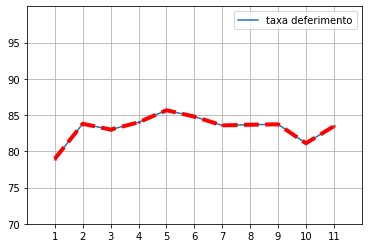

In [75]:
y = []
x = []
#confere média de tempo de registro
for mes in range(1, 12, 1):
    ano = 2022
    deferidos = 0
    indeferidos = 0 
    total = 0
    comando = f'select * from arquivados where year(data)={ano} and month(data)={mes} and despacho in ("9.1","9.2") and anulado=0'
    cursor.execute(comando)
    resultado = cursor.fetchall()
    for row in resultado:
        numero = str(row[2])
        despacho = row[1]
        if despacho=='9.1':
            deferidos = deferidos + 1
        else:
            indeferidos = indeferidos + 1
        total = total + 1
    
    media=0
    if total>0:
        percentual = 100*(deferidos)/(deferidos + indeferidos)
    y.append(percentual)
    x.append(mes)
    print(f'Taxa deferimento: {total} {mes} = {percentual:.2f}')

plt.grid(visible=True)
plt.plot(x,y,label="taxa deferimento")
plt.ylim(70, 100)
plt.yticks(range(70,100,5))
plt.xlim(min(x)-1, max(x)+1)
plt.xticks(range(1, 12 , 1))
plt.legend()
plt.plot(x,y,color='red' , marker='x', markersize=2, linestyle='--', linewidth=4)
plt.show()
